In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib




In [3]:
data = './olympics_unique.csv'

olympics_df = pd.read_csv(data)

In [4]:
olympics_df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
olympics_df['GDP']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
904    9.103096e+10
905             NaN
906    6.690380e+10
907    1.758471e+09
908             NaN
Name: GDP, Length: 909, dtype: float64

In [6]:
# 결측치를 최소값으로 채움
#olympics_df['GDP'] = olympics_df['GDP'].fillna(olympics_df['GDP'].median())



In [7]:
olympics_df

,Year,Team,Total_Athletes,total_medal,Country_host,GDP,NOC,Population
0,1960,Argentina,4,4,Italy,NaN,ARG,20619075.0
1,1960,Australia,33,46,Italy,NaN,AUS,10276477.0
2,1960,Austria,3,3,Italy,NaN,AUT,7047539.0
3,1960,Belgium,4,4,Italy,NaN,BEL,9153489.0
4,1960,Brazil,13,13,Italy,NaN,BRA,72207554.0
...,...,...,...,...,...,...,...,...
904,2016,Ukraine,13,15,Brazil,9.103096e+10,UKR,45004645.0
905,2016,United Arab Emirates,1,1,Brazil,NaN,ARE,9269612.0
906,2016,Uzbekistan,13,13,Brazil,6.690380e+10,UZB,31848200.0
907,2016,Venezuela,3,3,Brazil,1.758471e+09,VEN,31568179.0


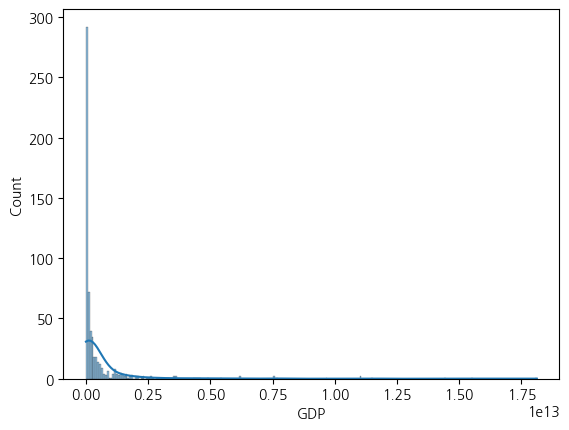

In [8]:
sns.histplot(olympics_df['GDP'], kde=True)
plt.show()

In [9]:
# 그래프 값이 너무 튀어서 log 변환
olympics_df['GDP_log'] = np.log10(olympics_df['GDP']+1)

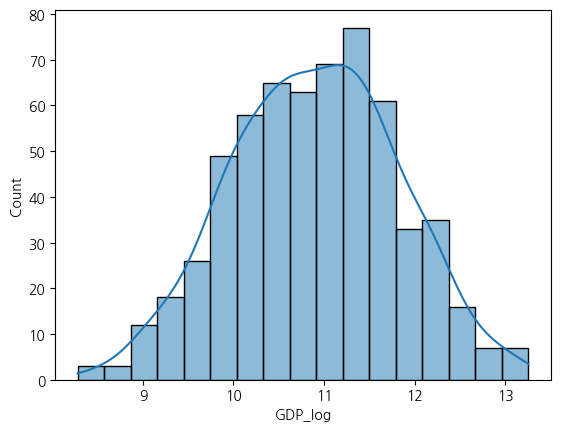

In [10]:
sns.histplot(olympics_df['GDP_log'], kde=True)
plt.show()

In [1]:
# QQ plot
import scipy.stats as stats



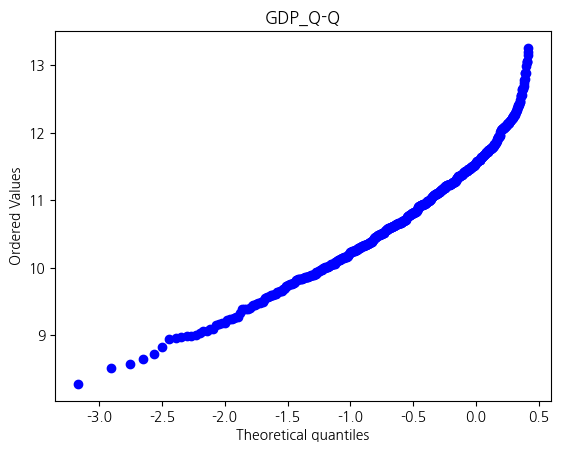

In [11]:
# QQ 
stats.probplot(olympics_df['GDP_log'], dist='norm', plot=plt )

plt.title('GDP_Q-Q')
plt.show()




In [12]:
olympics_df['Host'] = (olympics_df['Team'] == olympics_df['Country_host']).astype(int)

In [13]:
# 올림픽 계최국 확인
olympics_df[olympics_df[['Year','Team','Host']]['Host'] ==1]

,Year,Team,Total_Athletes,total_medal,Country_host,GDP,NOC,Population,GDP_log,Host
19,1960,Italy,78,88,Italy,NaN,ITA,5.019970e+07,NaN,1
64,1964,Japan,54,62,Japan,6.949813e+10,JPN,9.782600e+07,10.841973,1
142,1972,Germany,223,253,Germany,NaN,DEU,7.868845e+07,NaN,1
181,1976,Canada,19,23,Canada,1.738340e+11,CAN,2.351800e+07,11.240135,1
241,1980,Russia,385,442,Russia,NaN,RUS,1.390100e+08,NaN,1
296,1984,USA,290,352,USA,3.638140e+12,USA,2.358250e+08,12.560879,1
341,1988,South Korea,72,77,South Korea,1.461330e+11,KOR,4.203125e+07,11.164748,1
407,1992,Spain,68,69,Spain,5.755990e+11,ESP,3.915768e+07,11.760120,1
490,1996,USA,227,259,USA,7.664060e+12,USA,2.693940e+08,12.884459,1
498,2000,Australia,161,183,Australia,3.891470e+11,AUS,1.915300e+07,11.590114,1


In [14]:
print(olympics_df[['Host','total_medal']].corr())


                 Host  total_medal
Host         1.000000     0.341153
total_medal  0.341153     1.000000


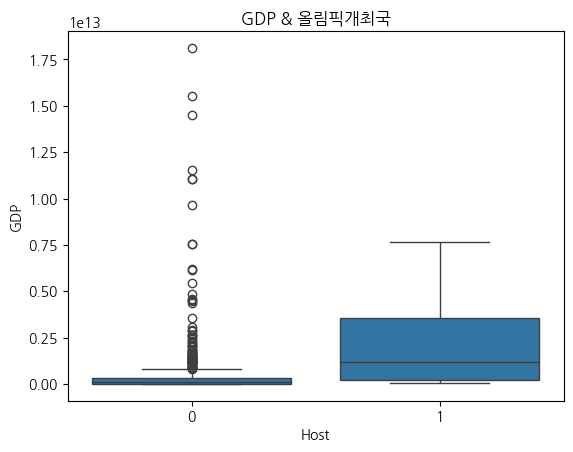

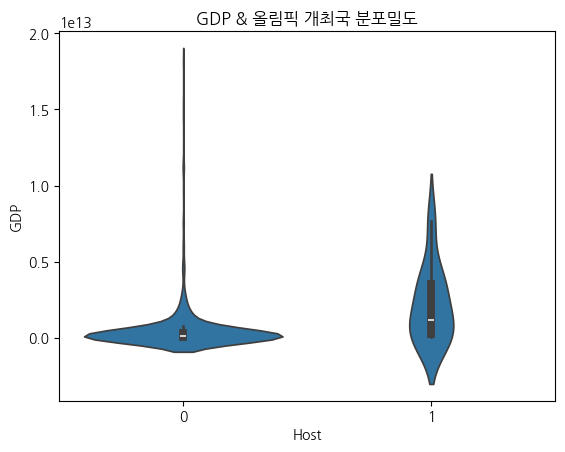

In [15]:
# Boxplot
sns.boxplot(x=olympics_df['Host'],y=olympics_df['GDP'])
plt.title('GDP & 올림픽개최국')
plt.show()


# 분포밀도
sns.violinplot(x = olympics_df['Host'], y = olympics_df['GDP'])
plt.title('GDP & 올림픽 개최국 분포밀도')
plt.show()

In [16]:
# GDP 데이터를 개최국 여부에 따라 그룹화
from scipy.stats import levene

gdp_host = olympics_df[olympics_df['Host']==1]['GDP_log']
gdp_no_host = olympics_df[olympics_df['Host']==0]['GDP_log']

gdp_host.fillna(gdp_host.median(),inplace=True)
gdp_no_host.fillna(gdp_host.median(),inplace=True)
stat, p = levene(gdp_host,gdp_no_host)
print(f'등분산성 : {p}')

등분산성 : 0.03987736524626324


C:\Users\KDT17\AppData\Local\Temp\ipykernel_15456\326855985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_host.fillna(gdp_host.median(),inplace=True)
C:\Users\KDT17\AppData\Local\Temp\ipykernel_15456\326855985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_no_host.fillna(gdp_host.median(),inplace=True)


In [17]:
olympics_df[['GDP_log','Host']].corr()

,GDP_log,Host
GDP_log,1.000000,0.147151
Host,0.147151,1.000000
